<a href="https://colab.research.google.com/github/Anupam-Bangal/Machine_Learning/blob/main/Clothing_Identification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the network

In [23]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

import matplotlib


--2022-03-25 10:54:44--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [24]:
import torch
from torchvision import transforms, datasets
from torch import nn, optim
import helper

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download =True,train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle =True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle =True)


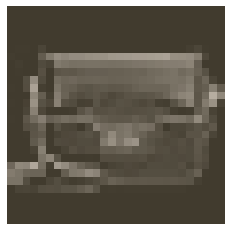

In [25]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

#Buliding the network

In [26]:
from torch import nn, optim
import torch.nn.functional as F

In [27]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim = 1)

    return x

# Train the network

In [28]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)   # same as SGD but it uses momentum to speed up actual fitting process

In [29]:
epochs = 5

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    logps = model(images)
    loss = criterion(logps, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  else:
    print(f'traing loss: {running_loss}')

traing loss: 485.386294066906
traing loss: 366.68953716754913
traing loss: 333.8236190825701
traing loss: 315.4073491245508
traing loss: 298.29472095519304


# Test


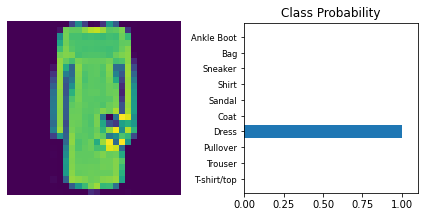

In [30]:
%matplotlib inline
%config InLineBackend.figure_format = 'retina'
import helper

dataiter = iter(trainloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))

helper.view_classify(img, ps, version='Fashion')